# Scikit Learn using RAW

We are taking a json file with a dataset, reshaping it using raw and running a linear regression algorithm from scikit-learn

In [1]:
%load_ext raw_magic

# Exploring the data 
This file is a record with several fields, the most important 'data' with info on subjects and 'target' with the expected result.


In [2]:
%buckets_register raw-tutorial

API error: S3 credentials already exists


In [3]:
%query read("s3://raw-tutorial/ipython-demos/diabetes.json")

Query creating a model from the data (using only bmi)
- Note that x_train and x_test are 2D arrays, the table visualization flattens arrays

In [4]:
%%query

diabetes := read("s3://raw-tutorial/ipython-demos/diabetes.json");

bmi := select bmi from diabetes.data;

// Outputting a records with the fields
(
    x_train: select [_2] from enumerate(bmi) where _1 < 422, 
    x_test:  select [_2] from enumerate(bmi) where _1 >= 422,
    y_train: select _2 from enumerate(diabetes.target) where _1 < 422,
    y_test: select _2 from enumerate(diabetes.target) where _1 >= 422
)


x_train,x_test,y_train,y_test
0.0616962065186885,0.077863387626902,151.0,233.0
-0.0514740612388061,-0.0396181284261162,75.0,91.0
0.0444512133365941,0.0110390390462862,141.0,111.0
-0.0115950145052127,-0.0406959404999971,206.0,152.0
-0.0363846922044735,-0.0342290680567117,135.0,120.0
-0.0406959404999971,0.00564997867688165,97.0,67.0
-0.0471628129432825,0.088641508365711,138.0,310.0
-0.00189470584028465,-0.0331512559828308,63.0,94.0
0.0616962065186885,-0.0568631216082106,110.0,183.0
0.0390621529671896,-0.030995631835069,310.0,66.0


## Querying diabetes dataset (JSON) in RAW

Note the dataset wouldn't be queryable in other systems, given it is a complex JSON format.

In [5]:
from rawapi import new_raw_client

client = new_raw_client()

# Querying JSON directly; output is a record with 4 fields (x/y train/test) with arrays for numpy
dataset = client.query('''
    diabetes := read("s3://raw-tutorial/ipython-demos/diabetes.json");

    bmi := select bmi from diabetes.data;

    // Outputting a records with the fields
    (
        x_train: select [_2] from enumerate(bmi) where _1 < 422, 
        x_test:  select [_2] from enumerate(bmi) where _1 >= 422,
        y_train: select _2 from enumerate(diabetes.target) where _1 < 422,
        y_test: select _2 from enumerate(diabetes.target) where _1 >= 422
    )
''')

## Running the regression model

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(dataset['x_train'], dataset['y_train'])

# Make predictions using the testing set
diabetes_y_pred = regr.predict(dataset['x_test'])

# Plotting the output

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


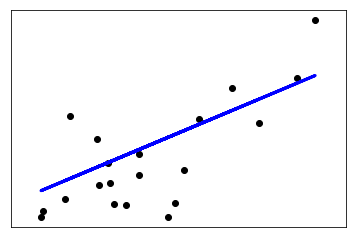

In [7]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error( dataset['y_test'], diabetes_y_pred))

# Explained variance score: 1 is perfect predictionb
print('Variance score: %.2f' % r2_score(dataset['y_test'], diabetes_y_pred))

# Plot outputs
plt.scatter(dataset['x_test'],  dataset['y_test'],  color='black')
plt.plot(dataset['x_test'], diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()